# AFS 505 Spring 2023, Unit 2 Project



## Background

This project will cover all aspects of the Data Analytics with Python unit.  To complete the project, follow the instructions at each step in the notebook and add Python code or written explanations as instructed.   Some tasks below will require you to answer with a written response rather than writing code.  Those tasks begin with the words "Explain" or "Write".


## Due Dates

This project requires knoweldge gained throughout the unit. However, waiting until the end of the unit make this project overwhelming.  Instead, as we cover the material required for different sections you are required to check-in the project. This ensures continued progress throuhgout the unit.

Project Check-in dates are 
- Thursday March 2, Sections 1-3
- Thursday March 9, Section 4
- Thursday March 23, Sections 5-6
- Thursday March 31, Completed Project



## How to turn in 
***DO NOT*** sumbit this poject to your GitHub repository.  Instead you will need to submit your check-ins via Canvas.


## Grading
Submission of the project on the check-in dates is worth 5 points per check-in. The prescribed sections must be fully completed, but they need not be correct.   Because grading in this course is subtractive, you only lose points if you do not check-in the project.  After final completion, the project will be graded for completeness and accuracy.  An accurate project is worth 25 points towards your grade.


## Data Introducution

To complete this project you will need to retrieve the "Cover Type Dataset" available at the UC Irvine Machine Learning Repository. You can find information about the dataset as well as the data [here](https://archive.ics.uci.edu/ml/datasets/Covertype).  To download the data, click the link at the top that reads **Data Folder**.  On the resulting page you will find three files for download.  Please download the file named `covtype.data.gz`, and use your preferred decompression utility to uncompress the file.  

Before you can begin with this project, you must familarize yourself with the data.  Please read the `convtype.info` file that is also available for download.  You can either download the file and open with your favorite text editor or [view it in the web browser](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).

In Summary:

> Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes.  However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.  **One method of obtaining this information is through the use of predictive models.**  

> [The purpose of this dataset is for] predicting forest cover type from cartographic variables... The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data... Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 



Here are some hints to help explain some of the data columns:

- Slope:  The angle in degrees of the slope on which the forest cover is growing.  
- Aspect:  The direction the slope is facing in degrees azimuth:  North = 0, East = 90, South = 180, West = 270.
- The columns representing shade contain values from 0 to 255 with 0 meaning no sun and 255 meaning full sun.
- There are 40 columns representing differnet soil types.  See the `convtype.info` file for a listing of these types.  The observations in these 40 columns indicate if cover was: absent = 0, present = 1
- There are 4 columns representing 4 different wilderness areas. The observations in these 4 columns indicate if cover was:  absent = 0, present = 1



## Objective
For this project you will utilize Numpy, Pandas, Matplotlib, Seaborn and Sklearn to create a Supervised Machine learning model that can assist natural resouce managers predict tree cover in neighboring lands.
 


## Tips
1. If you feel that your solution in a cell is too complicated, it probably is.  Check the online documentation and expect there may be shortcuts to do what you want.
2. If you encounter Memory Error or the notebook seems to not execute, you may need to restart the Kernel and re-run the cells.
3. Please contact the instructor if you have questions about this project.  You may ask any question you want!
4. Before turning in your notebook carefully re-read each step to ensure you've followed it correctly.


## Academic Honesty
You must work on your own to complete this project.  You should not work on this project together with other students. If you have questions please ask the instructurs or post them to the Slack channel where every student can see your question and benefit from any answers. You may consult the notebooks provided to you for the class or the online documentation for any of the tools (e.g. Numpy, Pandas, Seaborn, or Sklearn). 

---
## 1. Setup the Notebook
**1a.** Load all the necessary packages and libraries required for the entire notebook using the following (5 pts).

In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

---
## 2. Import the data
**2a.** First, import the data. Note, it does not have any headers. This is a large dataset so it may  take a minute to load (3 pts).

In [2]:
data = pd.read_csv("/Users/evandomsic/Desktop/Coursework/AFS 505/covtype.csv", header= None)

**2b.** Display the first 10 lines of the data (3 pts).

In [3]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


**2c.** Add appropriate headers to the data frame, using the following array:

```python
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]
```
(3 pts)

In [4]:
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]
 
data.columns = headers



**2d.** Display the first 10 lines of data again to confirm the headers are present (3 pts).

In [5]:
data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


---
## 3. Explore the Data
**3a.** Show the dimensions of the data (3 pts).

In [6]:
data.shape

(581012, 55)

**3b.** Show the datatypes of all of the columns in the data (3 pts).

In [7]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Rawah                                 int64
Neota                                 int64
Comanche_Peak                         int64
Cache_la_Poudre                       int64
ST1                                   int64
ST2                                   int64
ST3                                   int64
ST4                                   int64
ST5                                   int64
ST6                                   int64
ST7                                   int64
ST8                                   int64
ST9                             

**3c.** Show if the dataset has any missing values (3 pts).

In [8]:
data.isna()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**3d.** Show how many rows of data are duplicated (3 pts).

In [9]:
duplicated = data.duplicated()
print(duplicated)

0         False
1         False
2         False
3         False
4         False
          ...  
581007    False
581008    False
581009    False
581010    False
581011    False
Length: 581012, dtype: bool


**3e.** Show how many unique values there are per column (3 pts).

In [10]:
data.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Rawah                                    2
Neota                                    2
Comanche_Peak                            2
Cache_la_Poudre                          2
ST1                                      2
ST2                                      2
ST3                                      2
ST4                                      2
ST5                                      2
ST6                                      2
ST7                                      2
ST8                                      2
ST9                                      2
ST10       

---
## 4. Clean the Data
### 4.1. Missing Values
**4a.** If the dataset had missing values, determine if you need to clean the data. If so, show the code below. If you do not perform any cleaning indicate why (change the cell to "raw" type to write your explanation)  (3 pts).

In [11]:
data_clean = data.dropna()

data_clean.shape

#there are no NA's in the data frame

(581012, 55)

### 4.2 Duplicated Data
**4b.** If the dataset had duplicated values, determine if you need to clean the data. If so, show the code below. If not, describe the status of duplicated data in this dataset (change the cell to "raw" type to write your explanation)  (3 pts).

In [12]:
data_clean = data.drop_duplicates()

data_clean.shape

#There are no duplicated values to drop 

data_clean.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


**4c.** Explain if the unique number of values or each of the categorical columns (non numeric and non binary) match what is expected based on the description of the data  (3 pts).

### 4.3 Fix Categorical Data
Some of the columns are categorical (i.e. qualitative).  Remember, just becauase a column contains numbers does not mean it is quantitative. In the online description of the data, the authors stated that the soil types and wilderness areas are qualitative (categorical). You must decide if this is true given the dataset.

**4d.** Write the names of the columns that are categorical (3 pts).

**4e.** Change all categorical columns that were imported as a numeric type to a string type  (3 pts).

In [13]:
data_clean.dtypes

data_clean.columns

#convert columns to categorical string 

#df[cat_cols] = df[cat_cols].astype(str)

data_clean[ ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']] = data_clean[ ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']].astype(str)

**4f.** Confirm that all categorical columns are no longer numeric (3 pts).

In [14]:
data_clean.dtypes #code worked 

data2 = data_clean

data_clean.head(10)

data_clean.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah', 'Neota', 'Comanche_Peak',
       'Cache_la_Poudre', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type'],
      dtype='object')

**4g.** The `Cover_Type` column is a string but appears numeric, and each number represents a unique class of trees. Convert the numeric values to their corresponding string representations. Print the top 10 entries to confirm your replacement worked (5 pts).

In [15]:
data2["Cover_Type"] = data2["Cover_Type"].replace({
                                "1": "Spruce/Fir",
                                "2": "Lodgepole Pine",
                                "3": "Ponderosa Pine",
                                "4": "Cottonwood/Willow",
                                "5": "Aspen",
                                "6": "Douglas-fir",
                                "7": "Krummholz"})

data2.head(10)

#Code worked

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,Aspen
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,Aspen
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,Aspen
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,Aspen
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,Aspen


### 4.4 Subset the Data
The dataset is a bit large for this notebook. It will consume too much RAM on your computer.  If we were executing this on a computer with more RAM we might just write a Python script to do the work rather than use a Jupyter notebook.  To reduce the dataset we should subset our data to save resources. 

**4h.** Before we subset the data, let's explore the number of samples per cover type.  For the `Cover_type` column, show the counts of each type of cover, and sort the results from largest to smallest (5 pts).

In [16]:
counts = data2['Cover_Type'].value_counts().sort_values(ascending=False)

print(counts)

Lodgepole Pine       283301
Spruce/Fir           211840
Ponderosa Pine        35754
Krummholz             20510
Douglas-fir           17367
Aspen                  9493
Cottonwood/Willow      2747
Name: Cover_Type, dtype: int64


**4i.**  The results of the previous cell show that the number of measurements per cover type is imbalanced with the smallest having 2,747 observations and the largest 283,301.  Let's subset the data to only include 2,000 randomly selected samples from each cover type.   We have not covered in class how to do this, so below is a code sample you can use. 
```python
df = df.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)
```
Notice in the line of code above, we first perform a `groupby` operation to organize rows by their cover type. Next, we  call `apply` on each group. With the `apply` function you must provide the name of the function that will be called for each group. In this case, the word `lambda` tells python that we are declaring an "anonymous" in-line function (no `def` line) that takes an argument `x`.  As the apply is executed on each group, the variable `x` contains the data for each group, and is actually a Pandas DataFrame. Hence, we can call `sample` to select 2000 random rows.  The `apply` function returns a new DataFrame containing all selected rows from all groups.  On this data frame we call `reset_index` to renumber the index for all of our rows.

(3 pts)

In [17]:
data2 = data2.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)

**4j.** Re-run the same command from task 4f. The results should show an even 2,000 samples of each cover type (3 pts).

In [18]:
data2.dtypes

data2.head(10)

counts = data2['Cover_Type'].value_counts().sort_values(ascending=False)

print(counts)

Aspen                2000
Cottonwood/Willow    2000
Douglas-fir          2000
Krummholz            2000
Lodgepole Pine       2000
Ponderosa Pine       2000
Spruce/Fir           2000
Name: Cover_Type, dtype: int64


### 4.5 Tidy or not to Tidy?

You'll notice that this dataset is not tidy!  We have a variable in the headers:  the different soil types.  To tidy this data we would normally melt the soil types into a single column, perhaps named `Soil_Type`. We could then remove all rows where the soil type was not present (i.e. has a value of 0) and drop the melted values column with the absent/present binary value.  

However, as we've learned in class, the Sklearn package which we will use for machine learning cannot handle strings for categorical data.  It wants categorical data reset as numeric values: one for each category. But this only works for ordinal data.  Our soil type data is not ordinal.  If we melted our dataframe, then for machine learning we would need to perform ["One Hot Encoding"](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) to put the `Soil_Type` column dataframe into a format that Sklearn approves of. The end result is a pivot of the dataframe back to what it currently is!  So, even though we should Tidy this dataset, let's leave it as is for Sklearn.

---
## 5. Understand the data
### 5.1  Review Categorical Data

**5a.** Generate a dataframe that contains the number of times we see a soil type present for each cover type.  Show the top 10 rows of the dataframe.

For example:

<table>
    <tr><th></th><th>Cover_Type</th><th>Soil_Type</th><th>Present</th></tr>
    <tr><th>0</th><th>Aspen</th><th>ST02</th><th>53</th></tr>
    <tr><th>1</th><th>Aspen</th><th>ST04</th><th>117</th></tr>
    <tr><th>2</th><th>Aspen</th><th>ST10</th><th>64</th></tr>
    <tr><th>3</th><th>Aspen</th><th>ST11</th><th>148</th></tr>
    <tr><th>4</th><th>Aspen</th><th>ST13</th><th>319</th></tr>
</table>

Hint:
- Start with a reduced dataframe that only contains the 40 soil types + `Cover_Type`
- Melt the data.
- Exclude soil types that are absent.
- Use a `groupby`.

(5 pts)

In [19]:
data2.columns

data2_reduced = data2[['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
                      'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19',
                      'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28',
                     'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37',
                      'ST38', 'ST39', 'ST40', 'Cover_Type']]

data2_reduced

# melt the DataFrame
melted_df = data2_reduced.melt(id_vars=["Cover_Type"], var_name="Soil_Type", value_name='Present')
melted_df.head(10)

#Need to change Present to numeric
melted_df["Present"] = pd.to_numeric(melted_df["Present"])



#remove entrys with 0 

new_df = melted_df.loc[melted_df["Present"] != 0]

print(new_df)

# groupby using the Cover_Type and Soil_Type to get a count.
grouped_df = new_df.groupby(["Cover_Type", "Soil_Type"]).sum()

grouped_df.head(14)



               Cover_Type Soil_Type  Present
2008    Cottonwood/Willow       ST1        1
2034    Cottonwood/Willow       ST1        1
2035    Cottonwood/Willow       ST1        1
2083    Cottonwood/Willow       ST1        1
2090    Cottonwood/Willow       ST1        1
...                   ...       ...      ...
559749         Spruce/Fir      ST40        1
559753         Spruce/Fir      ST40        1
559845         Spruce/Fir      ST40        1
559888         Spruce/Fir      ST40        1
559904         Spruce/Fir      ST40        1

[14000 rows x 3 columns]


Present
Cover_Type Soil_Type         
Aspen      ST10            65
           ST11           161
           ST13           286
           ST16             5
           ST17           128
           ST18            40
           ST19            12
           ST2             61
           ST20            10
           ST23           145
           ST24            13
           ST26            30
           ST28             5
           ST29           232

**5b.** Using the dataframe just created, draw a plot showing the relationship between the cover type and the soil type. Size the points in the plot by the counts. Ensure that the axis ticks and legend are legible. Save the figure to a file named `covtype-soil_type.scatter.png` for viewing (5 pts). 

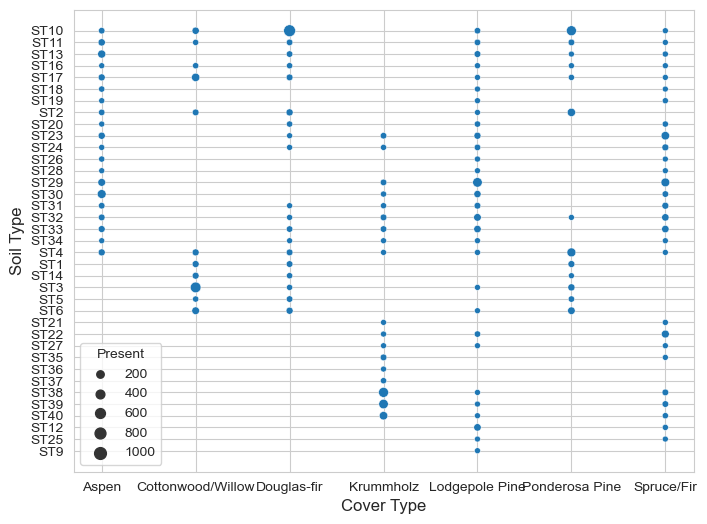

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(data=grouped_df, x="Cover_Type", y="Soil_Type", size="Present", legend="auto")
plt.xlabel("Cover Type", fontsize=12)
plt.ylabel("Soil Type", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("covtype-soil_type.scatter.png")



**5c.** Explain why it is important to review the scatterplot of "Cover_Type" vs. all the soil types (3 pts).

In [21]:
#This can help us understand if there are any relationships between soil type and cover type. What trees grow in which soils and which soils are formed by which cover types. 

### 5.2 Review the quantitative data
**5d.** Show the basic summary statistics for the quantitiatve data, excluding the 40 binary soil type columns (3 pts).

In [22]:
data2.head(10)
data2.columns

data_ml = data_clean.drop(columns=['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40','Rawah', 'Neota', 'Comanche_Peak',
       'Cache_la_Poudre'] ,axis=1)

data_ml.head(11)



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen
5,2579,132,6,300,-15,67,230,237,140,6031,Lodgepole Pine
6,2606,45,7,270,5,633,222,225,138,6256,Aspen
7,2605,49,4,234,7,573,222,230,144,6228,Aspen
8,2617,45,9,240,56,666,223,221,133,6244,Aspen
9,2612,59,10,247,11,636,228,219,124,6230,Aspen


In [23]:
data_ml.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


**5e.** Use the [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of Pandas Dataframes to create a single figure showing the histograms of every quantitative data column excluding the 40 binary soil type columns.  Size the figure to ensure all text is legible. Save the figure to a file named `covtype.histograms.png` for viewing. 

Hint:
- Because you will use the `DataFrame.hist` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.

(5 pts)

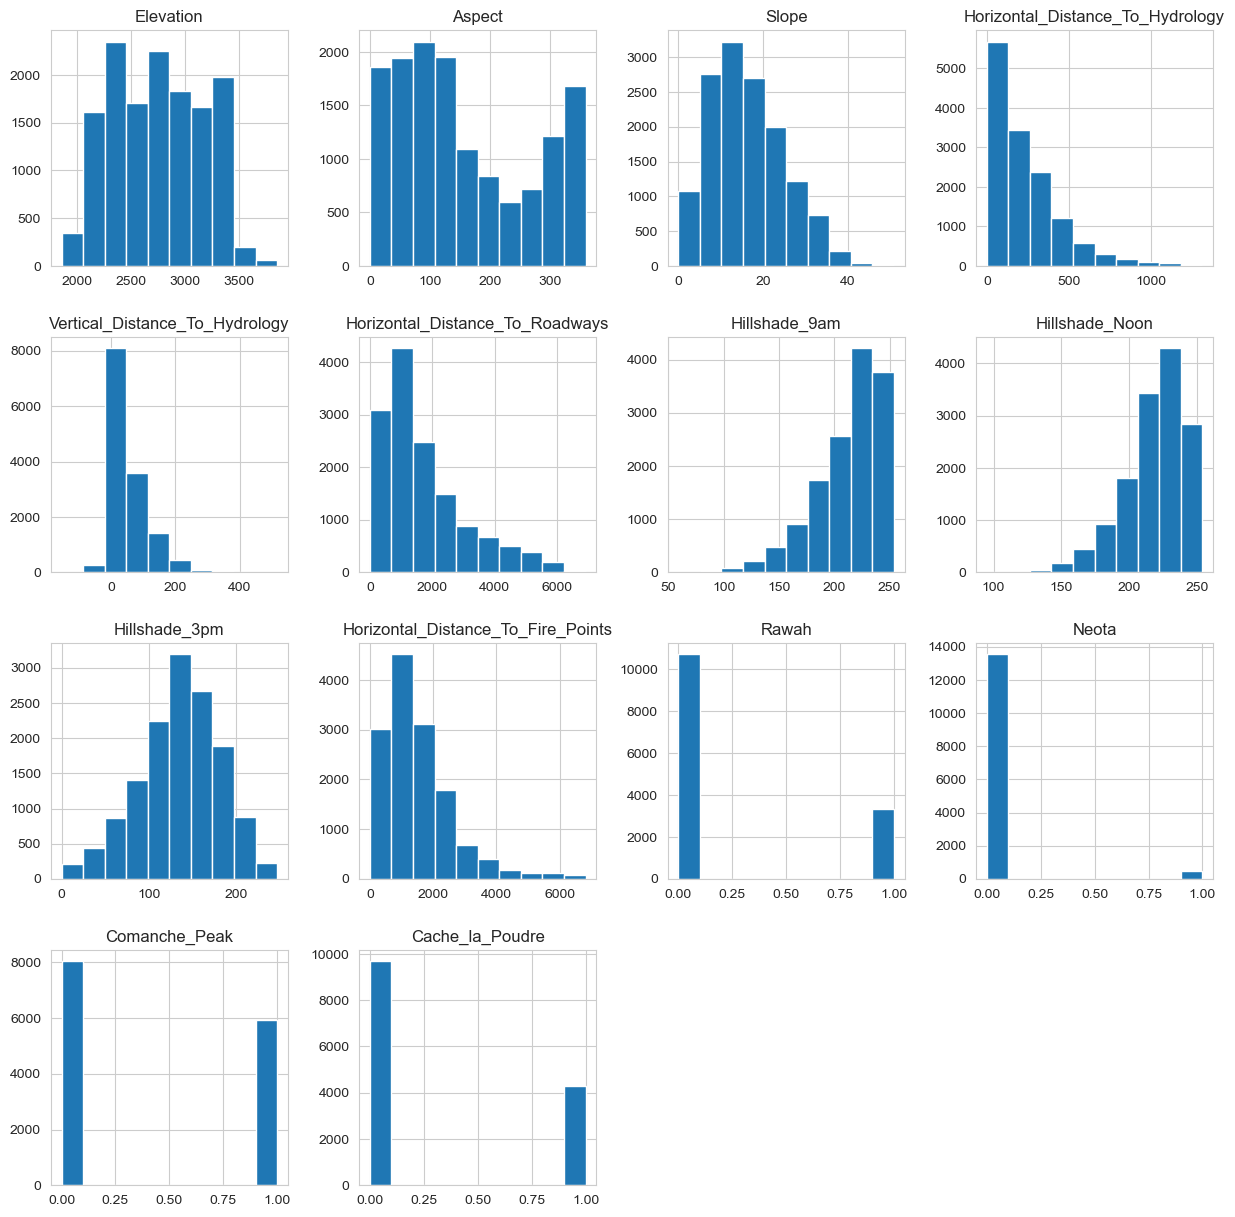

In [24]:
data2.hist(figsize=(15,15))

plt.savefig('covtype.histograms.png')

**5f.** Explain why it is important to examine the histogram of each quantitative column (3 pts).

**5g.** Use the Seaborn [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function to gererate a scatterplot of every quantitative column (excluding the 40 binary soil type columns) with every other quantitative column.  Use `Cover_Type` as the `hue` argument, use `"kde"` as the `diag_kind` argument, and use `5` as the `height` argument.  Because each scatterplot will be small we need to limit the size and number of points. Otherwise, the points overlap which and will hide the color of those behind.  Include only 1000 randomly selected rows from the dataset.  To further improve the plot we can set the size of the point size using the `plot_kws` argument.  Set it using the dictionary: `{"s": 15}`.

Hint: 
- Use the `qual_cols` argument to only include the list of columns you want to plot.
- Use the `sample` function to limit the number of points.

The plot will be huge! You can view it in the notebook but it will be difficult to read the labels. Therefore, save the figure to a file named `covtype.pairplot.png` for viewing. It will take a few minutes to display the plot.

(5 pts)

In [25]:
# Sample 1000 rows
#data_sample = data_ml.sample(n=1000)

# Create the pairplot
#sns.pairplot(data_sample, hue="Cover_Type", diag_kind="kde", height=5, plot_kws={"s": 15})

# Save the plot to a file
#plt.savefig("covtype.pairplot.png", dpi=300, bbox_inches="tight")


<AxesSubplot:>

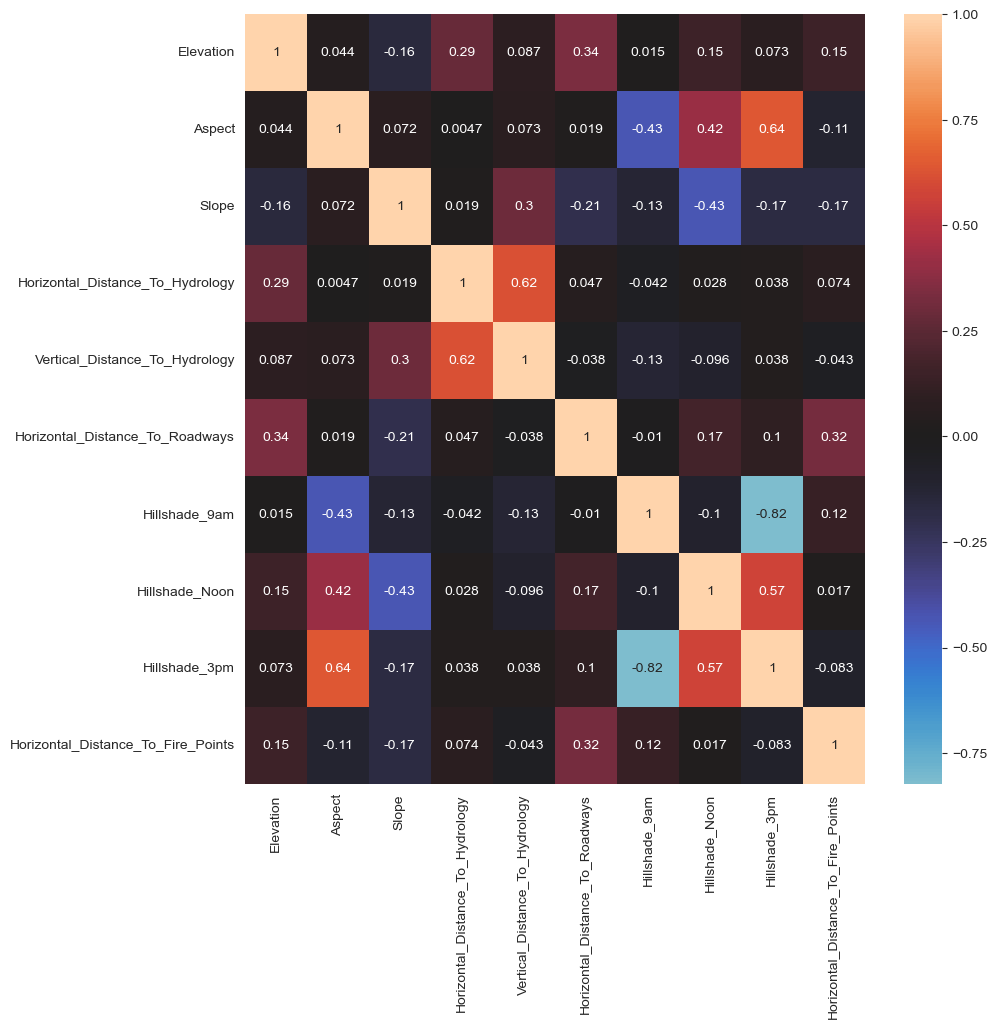

In [26]:
cor = data_ml.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(data=cor, annot=True, center=0)

**5h.** Explain why it is important to examine the pairwise scatterplots of all quantitative columns  (3 pts).

**5i.** Create 10 figures such that each figure corresponds to a single quantitative column in the data.  Each figure should contain 7 boxplots, one for each cover type, and should have a title indicating the quantitative column it describes. Save each figure using the naming scheme: `covtype-{column_name}.boxplot.png`. Replace the tag `{column_name}` with the name of the column represented by the figure.  Exclude outliers from the plots.

Hints: 
1. First, group the dataframe by `Cover_type`
2. Second, loop over all the names of quantitative columns.
3. Third, you can create a boxplot using the dataframe summary statistics:
   ```python
   # Create a boxplot using the descriptive summary of the data and the built-in plot function
   # of dataframes.
   df.describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90);
   ```
4. Because you will use the `DataFrame.plot` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function to save each plot. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.
5. Do not limit the numer of rows as in the pairplot.

(10 pts)

In [27]:
#Groupby covertype

data_ml.head()
data_final = data_ml.groupby("Cover_Type")
data_final.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen
5,2579,132,6,300,-15,67,230,237,140,6031,Lodgepole Pine
6,2606,45,7,270,5,633,222,225,138,6256,Aspen
7,2605,49,4,234,7,573,222,230,144,6228,Aspen
11,2886,151,11,371,26,5253,234,240,136,4051,Lodgepole Pine
12,2742,134,22,150,69,3215,248,224,92,6091,Lodgepole Pine


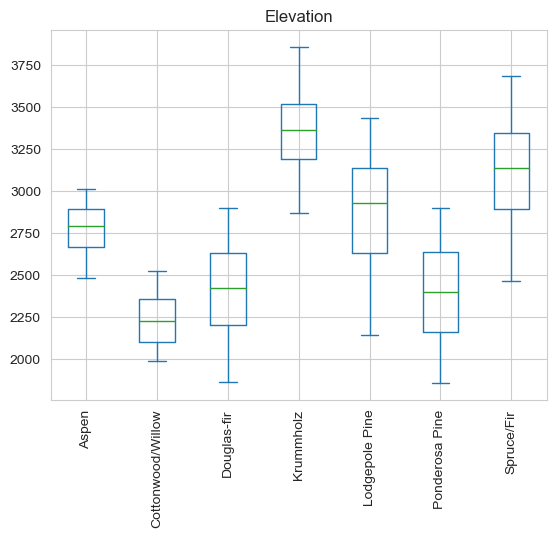

<Figure size 640x480 with 0 Axes>

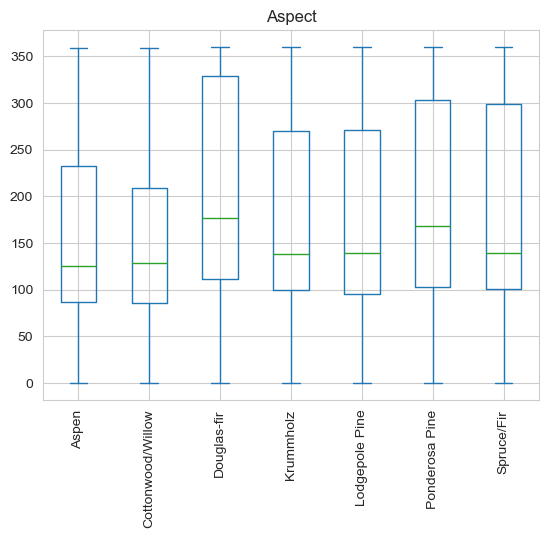

<Figure size 640x480 with 0 Axes>

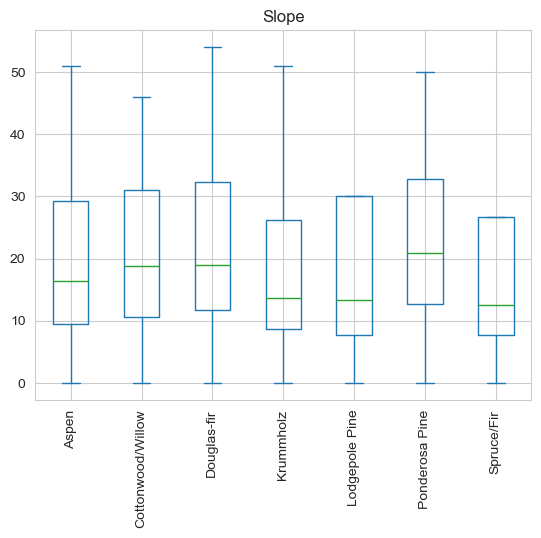

<Figure size 640x480 with 0 Axes>

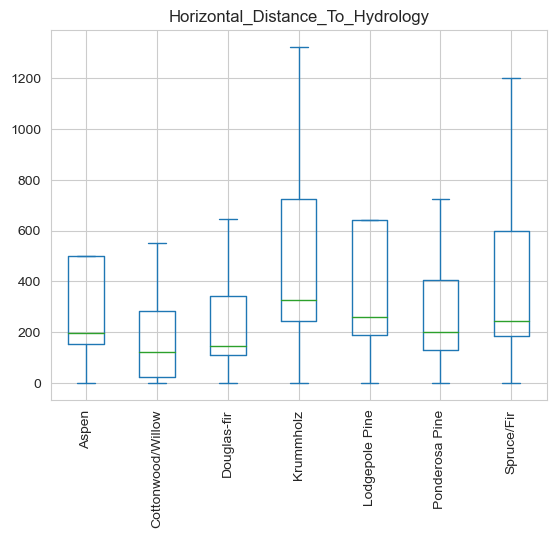

<Figure size 640x480 with 0 Axes>

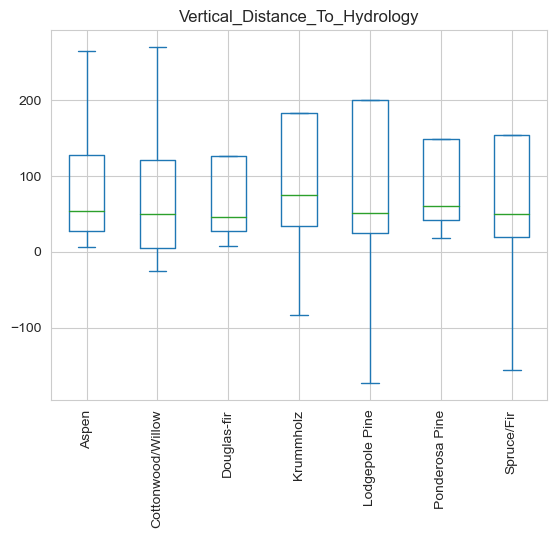

<Figure size 640x480 with 0 Axes>

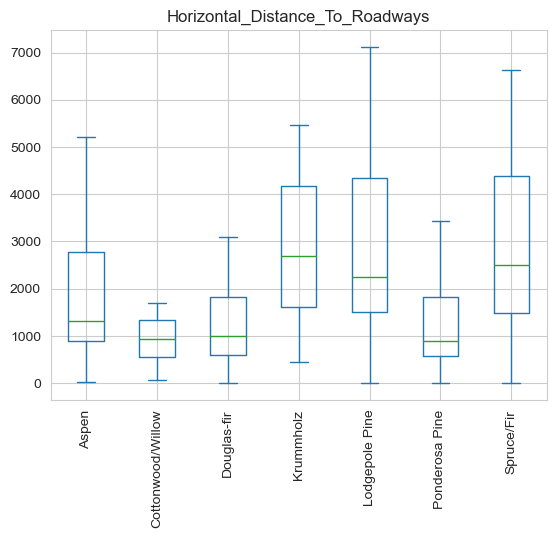

<Figure size 640x480 with 0 Axes>

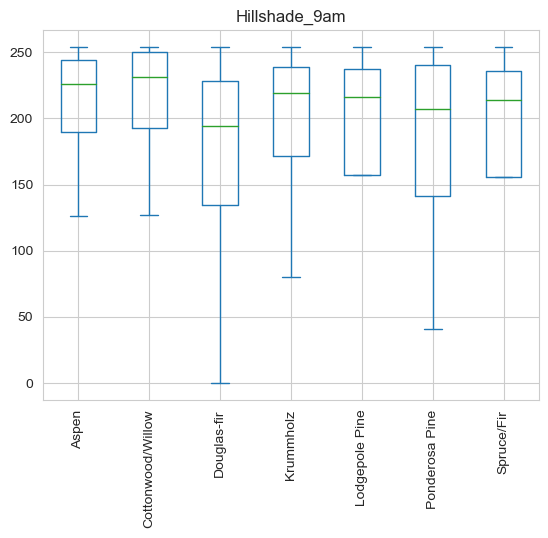

<Figure size 640x480 with 0 Axes>

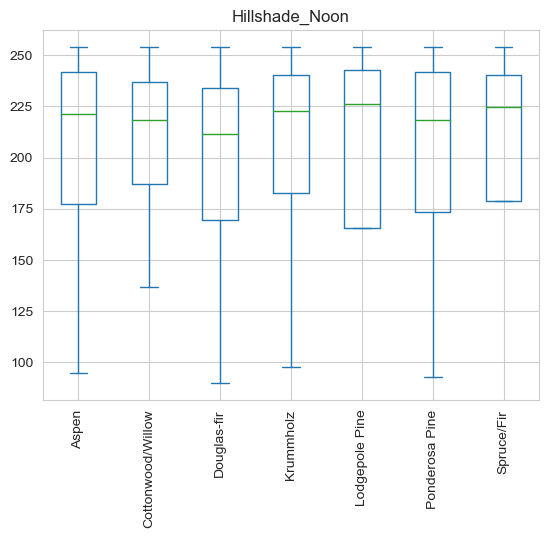

<Figure size 640x480 with 0 Axes>

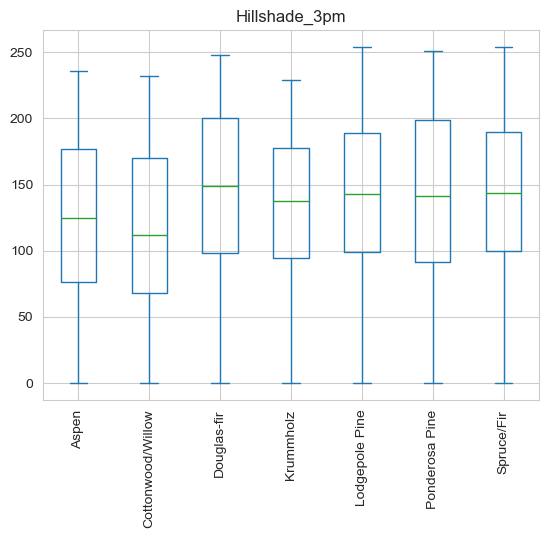

<Figure size 640x480 with 0 Axes>

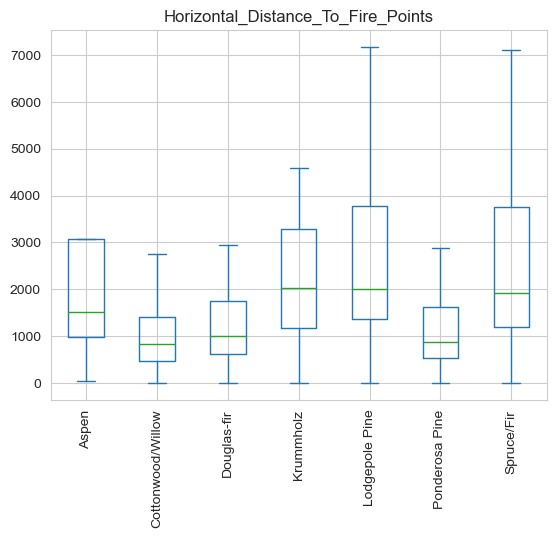

<Figure size 640x480 with 0 Axes>

In [28]:
#loop over all the names of quantitative columns.




#Third, you can create a boxplot using the dataframe summary statistics:
   # Create a boxplot using the descriptive summary of the data and the built-in plot function
   # of dataframes.

data_final["Elevation"].describe().transpose().plot(kind="box", title="Elevation", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.elevation.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Aspect"].describe().transpose().plot(kind="box", title="Aspect", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.aspect.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Slope"].describe().transpose().plot(kind="box", title="Slope", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.slope.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Horizontal_Distance_To_Hydrology"].describe().transpose().plot(kind="box", title="Horizontal_Distance_To_Hydrology", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.hor.distance.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Vertical_Distance_To_Hydrology"].describe().transpose().plot(kind="box", title="Vertical_Distance_To_Hydrology", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.ver.distance.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Horizontal_Distance_To_Roadways"].describe().transpose().plot(kind="box", title="Horizontal_Distance_To_Roadways", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.hd.roadway.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Hillshade_9am"].describe().transpose().plot(kind="box", title="Hillshade_9am", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.hillshade.9.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Hillshade_Noon"].describe().transpose().plot(kind="box", title="Hillshade_Noon", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.hillshade.12.boxplot.png", dpi=300, bbox_inches="tight")

data_final["Hillshade_3pm"].describe().transpose().plot(kind="box", title="Hillshade_3pm", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.hillshade.3.boxplot.png", dpi=300, bbox_inches="tight")


data_final["Horizontal_Distance_To_Fire_Points"].describe().transpose().plot(kind="box", title="Horizontal_Distance_To_Fire_Points", showfliers=False, rot=90)
plt.show()
plt.savefig("covtype.hor.distance.fire.boxplot.png", dpi=300, bbox_inches="tight")



**5j.** Explain why it is important to review the distribution of the "Cover_Type" column with every other quantitative data column (3 pts).

### 5.3 Check for outliers

**5k.** Identify if any quantitative columns have outliers. Do this by generating a **single** figure containing one boxplot for each quantitative column (excluding the 40 binary soil type columns). Save the figure as `covtype-outlier_check.png`. Unlike the previous 10 figures you do not need to create separate boxplots by cover type (5 pts).

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (10).

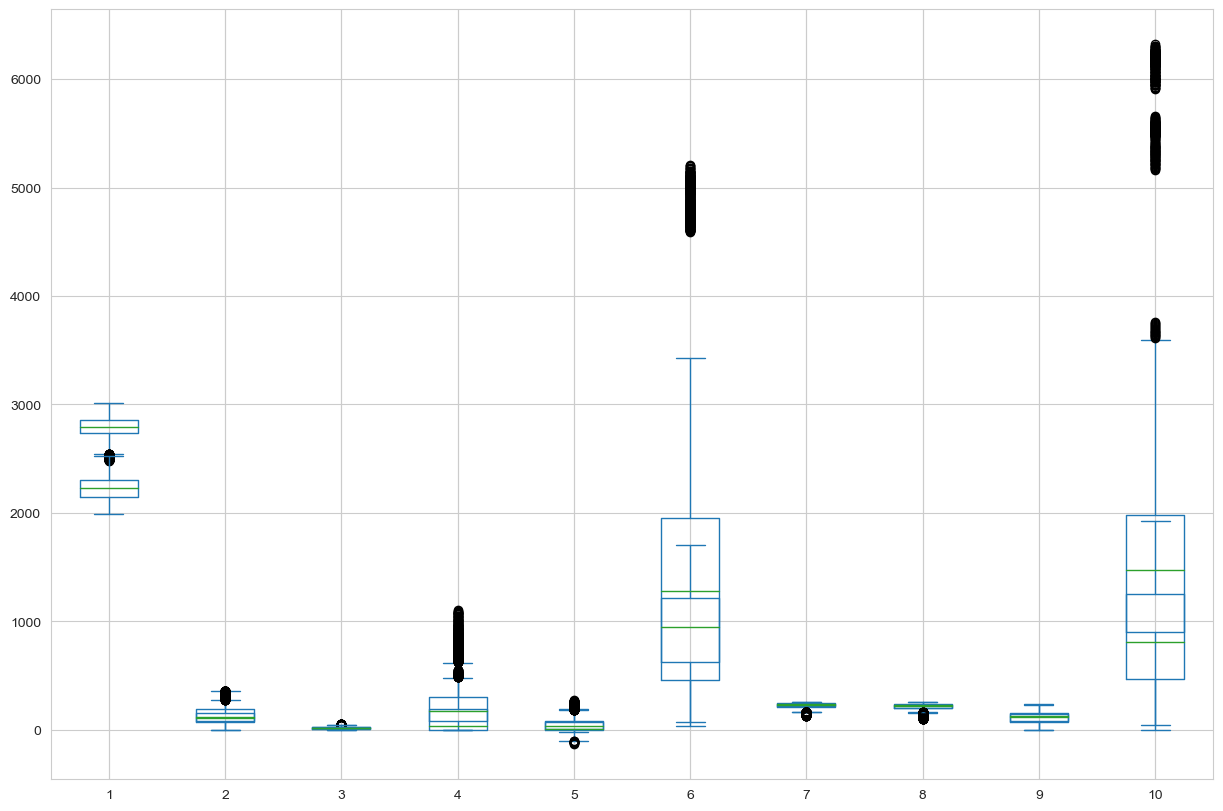

In [29]:
# Create a boxplot for each quantitative column
fig, ax = plt.subplots(figsize=(15, 10))
data_final.plot(kind="box", ax=ax, showfliers=True)

# Set the title and save the figure
ax.set_title("Outlier Check for Quantitative Columns")
plt.savefig("covtype-outlier_check.png")


**5l.** Explain why it is important to look for outliers prior to using machine learning techniques (3 pts).

In [ ]:
#If outliers are present in a dataset and are not accounted for, they can skew the statistical properties of the data. Also outliers can also lead to overfitting as we discussed in class. 

---
## 6. Make assumptions

**6a.** Explain which columns of data would be poor predictors of cover type. Justify your answer by referring to the plots from Section 5 (3 pts).

**6b.** Write which columns you expect can contribute to prediction of cover type? (3 pts).

---
## 7. Perform Supervised Machine Learning
### 7.1 Prepare the Data

**7a.** Create a subset of the original data that contains only the columns you indicated in task 6b and the `Cover_Type` column.  Print the list of remaining columns to verify the dataframe has the columns you want to keep:

Hint:
- Drop all column from the dataset not deemed predictive.

(3 pts)

In [27]:
#Reloading data from the begining to get around errors likley caused earlier in the code which turned the df into a  DataFrameGroupBy object

ml_data = pd.read_csv("/Users/evandomsic/Desktop/Coursework/AFS 505/covtype.csv", header= None)

headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]
 
ml_data.columns = headers

ml_data[ ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']] = ml_data[ ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']].astype(str)

ml_data["Cover_Type"] = ml_data["Cover_Type"].replace({
                                "1": "Spruce/Fir",
                                "2": "Lodgepole Pine",
                                "3": "Ponderosa Pine",
                                "4": "Cottonwood/Willow",
                                "5": "Aspen",
                                "6": "Douglas-fir",
                                "7": "Krummholz"})


ml_data = ml_data.drop(columns=['Rawah', 'Neota', 'Comanche_Peak',
       'Cache_la_Poudre',"Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"] ,axis=1)

ml_data.head(15)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,ST1,ST2,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,Cover_Type
0,2596,51,3,258,0,221,232,148,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,220,235,151,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,234,238,135,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,238,238,122,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,220,234,150,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
5,2579,132,6,300,-15,230,237,140,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
6,2606,45,7,270,5,222,225,138,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
7,2605,49,4,234,7,222,230,144,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
8,2617,45,9,240,56,223,221,133,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
9,2612,59,10,247,11,228,219,124,0,0,...,0,0,0,0,0,0,0,0,0,Aspen


**7b.** For machine learning we need to separate the column containing our dependent variable `Cover_Type` from the independent variables.  Create a Numpy array containing the dependent variable `Cover_Type`. Name it `Y` (3 pts).

In [28]:
y= ml_data["Cover_Type"].values


**7c.** Create a 2D numpy array containing only the independent variables (i.e. all of the predictive columns). Name it `X` (3 pts).

In [29]:
x= ml_data.drop("Cover_Type", axis=1).values

### 7.2 Normalize the data
Many machine learning algorithms expect that the quantitative columns have a mean centered at 0 with data points scaled to unit variance.  See the [preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) for Sklearn.

**7d**.  Normalize the `X` dataframe using the [preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) or [preprocessing.robust_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function of Sklearn. Choose the method most appropriate given the state of outliers in the data. (5 pts).

In [30]:
xs = preprocessing.robust_scale(x)

### 7.3 Split the data for testing and validation

**7e.** Use Sklearn to create a testing model by dividing the two numpy arrays into two groups, one with 80%, which will be used for training the models, and one with 20%, which will be used for validating the models.  A random seed is required. Use a seed  of `7`.  Name your trainig sets `Xt` and `Yt` and the validation sets `Xv` and `Yv` respectively (3 pts).

In [31]:
# Split-out validation dataset
xt, xv, yt, yv = model_selection.train_test_split(x, y, test_size=0.2, random_state=897)

# Print the shapes of each dataset
print("The sizes of the training independent and dependent datasets")
print(xt.size)
print(yt.size)
print("The sizes of the validation independent and dependent datasets")
print(xv.size)
print(yv.size)

The sizes of the training independent and dependent datasets
22310832
464809
The sizes of the validation independent and dependent datasets
5577744
116203


**7f.** We want to perform a 10-fold cross-validation scheme to estimate accuracy.  This will split our training dataset into 10 pieces, train on 9, test on 1 and repeat for all combinations.  Create a KFold model object for use later when running the machine learning alogrithms. Use a random state seed of `7`.  Name the KFold object `kfold` (3 pts).

In [32]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

### 7.3 Evaulate ML approaches
Using the training data created in task 7e and the KFold model created in task 7f, we will now execute a variety of ML algorithms.

**7g**. First, we want to store the results of all ML algorithms that we'll be using. Remember we'll be performing  a 10-fold cross-validation scheme so this will yield 10 results for each algorithm.   You will store the results of each ML algorithm into its approriate element of the dictionary.  Execute the following code to initialize a python dictionary where results will be stored.

```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
```
(3 pts)

In [33]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10)#,
    #'SVC' : np.zeros(10)
}


**7h.** Create two variables. One named `scoring` and the other `error_score`.  Set the value of `scoring` to `"accuracy"` and the `error_score` to `np.nan`. You will use these two variables for model section of every ML method below (3 pts).

In [34]:

scoring = "accuracy"
error_score = np.nan

**7i.** Execute the `LogisticRegression` algorithm and save the results in the `results` dictionary.  Use the following arguments:  `solver` as `"lbfgs"` and  `multi_class` as `"auto"` (3 pts).

In [35]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto",max_iter=100)

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, xt, yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

/Users/evandomsic/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evandomsic/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.63053721, 0.63200017, 0.62799854, 0.63621695, 0.6347755 ,
       0.632495  , 0.63666875, 0.63585121, 0.63232288, 0.63003442])

**7j.** Execute the `KNeighborsClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [36]:
# Create the KNeighborsClassifier object with defaults.
alg = KNeighborsClassifier()

# Execute the cross-validation strategy
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, xt, yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['KNeighborsClassifier']

/Users/evandomsic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/evandomsic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

array([0.78862331, 0.78612767, 0.78821454, 0.78761214, 0.78750457,
       0.78698823, 0.7851165 , 0.78905359, 0.78522407, 0.78395009])

**7k.** Execute the `LinearDiscriminantAnalysis` algorithm and save the results in the `results` dictionary (3 pts).

In [37]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Execute the cross-validation strategy
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, xt, yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LinearDiscriminantAnalysis']

array([0.668187  , 0.66470171, 0.67145715, 0.67010176, 0.66975754,
       0.67014479, 0.6660571 , 0.66937028, 0.66472322, 0.66501721])

**7l.** Execute the `DecisionTreeClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [38]:
# Create the DecisionTreeClassifier object with defaults.
alg = DecisionTreeClassifier()

# Execute the cross-validation strategy
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, xt, yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['DecisionTreeClassifier']

array([0.824595  , 0.81831286, 0.82117424, 0.82375594, 0.82016308,
       0.82330415, 0.82220692, 0.82433683, 0.82059336, 0.81964286])

**7m.** Execute the `GaussianNB` algorithm and save the results in the `results` dictionary (3 pts).

In [39]:
# Create the GaussianNB object with defaults.
alg = GaussianNB()

# Execute the cross-validation strategy
results['GaussianNB'] = model_selection.cross_val_score(alg, xt, yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['GaussianNB']

array([0.24521848, 0.24375551, 0.2466169 , 0.24579936, 0.24567027,
       0.24588542, 0.24063596, 0.24261526, 0.24549816, 0.24341652])

**7n.** Execute the `SVC` algorithm and save the results in the `results` dictionary. Use `auto` as the the `gamma` arument (3 pts).

In [ ]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')

# Execute the cross-validation strategy
results['SVC'] = model_selection.cross_val_score(alg, xt, yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['SVC']

KeyError: 'SVC'

**7o.** Create a figure of boxplots that shows the distribution of results from each method. Save the figure using the name `covtype.ML_results.png` (5 pts).

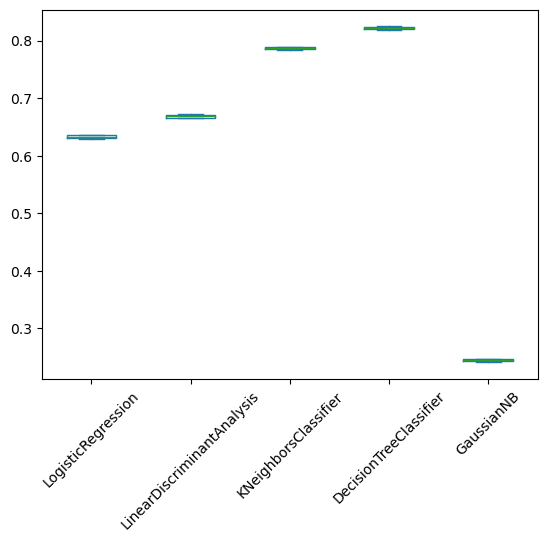

In [40]:
pd.DataFrame(results).plot(kind="box", rot=45);

**7p.** Write which algorithm you feel performed the best and explain (3 pts).

### 7.4 Make Predictions!

**7q.** Using the algorithm that performs the best, use it to make a prediction using the `Xv` validation we set aside earlier (5 pts).

In [23]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = KNeighborsClassifier()

# Create a new model using all of the training data.
alg.fit(xt, yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(xv)

# Let's see the predictions
predictions

/Users/evandomsic/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Ponderosa Pine', 'Spruce/Fir', 'Lodgepole Pine', ...,
       'Lodgepole Pine', 'Spruce/Fir', 'Krummholz'], dtype=object)

**7r**.  Show the accuracy score of the prediction (4 pts).

In [24]:
accuracy_score(yv, predictions)

0.791046702752941

**7s** Show the confusion matrix.  Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

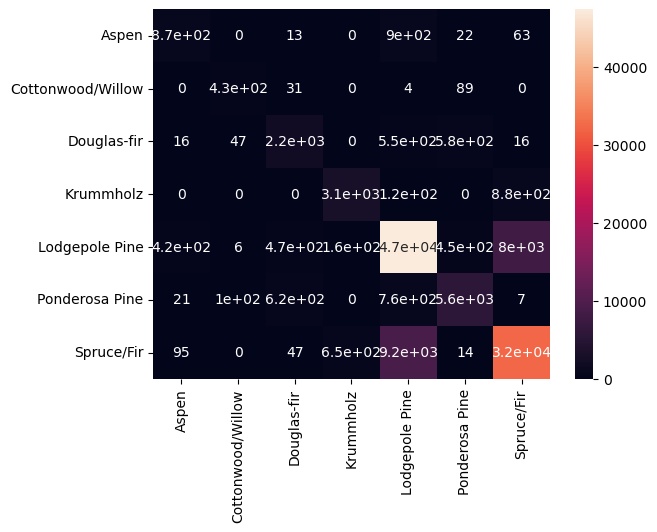

In [25]:
labels = ml_data["Cover_Type"].sort_values().unique()
cm = confusion_matrix(yv, predictions, labels=labels)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

**7t.** Print the classifcation report. Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

In [26]:
print(cm)

[[  869     0    13     0   902    22    63]
 [    0   434    31     0     4    89     0]
 [   16    47  2188     0   550   575    16]
 [    0     0     0  3131   119     0   880]
 [  424     6   467   155 47391   453  7981]
 [   21   100   618     0   765  5633     7]
 [   95     0    47   651  9150    14 32276]]


## 8. Summarize

**8a**.  Explain in your own words the meaning of the results in last three cells of Section 7. How well did the algorithm perform? (3 pts).

**8b.** Write if there anything you would do differently to try to improve the quality of the prediction (3 pts).